# Corn Price Predictive Model

## Introduction
This project aims to develop a model that predicts the price range of corn at the end of the next month and in the next 6 and 12 months. The project will be executed in two stages:



### Stage One
The first stage will use historical data on corn prices, oil prices, and weather conditions from key American growing regions to build the initial predictive model.

### Stage Two
The second stage will incorporate additional variables to enhance the model’s accuracy and reliability.



### Key Variables for Stage One
* Historic Corn Prices: The current price of corn affects future prices as farmers use this information to decide whether to plant corn this or next season. The machine learning algorithm will be trained on how corn prices react in relation to other key variables like weather and oil prices.

### Major Influences on Corn Prices
* Weather Conditions: Temperature, precipitation, and growing conditions are crucial for corn production. 
* Oil Prices: Corn is used in ethanol production, which is blended with gasoline. Changes in oil prices can affect the demand for ethanol and subsequently impact corn prices. Data to collect: Brent and Crude historical prices.
* Soybeans: Corn and soybeans are major crops with interrelated production. Farmers’ decisions on planting either crop based on market conditions affect the supply of the other. Data to collect: Soybean historical prices.
* Livestock: Corn is a significant component of animal feed. Changes in livestock demand can influence corn demand. Data to collect: Live cattle historical prices, soybean meal, and wheat prices.
* Government Policies: Agricultural policies, subsidies, and trade agreements can impact corn prices. Data to collect: (To be determined).
* Currency Fluctuations: Corn is traded globally, and changes in currency exchange rates influence its competitiveness. Data to collect: Currency exchange rates between leading exporting and importing nations (e.g., US to China, Argentina to Vietnam, and South Korea).
* Fertilizer Prices: Fluctuations in fertilizer prices impact corn production costs. Data to collect: Historical prices of nitrogen, phosphorous, potassium, insecticides, and fungicides.
* Global Supply and Demand: International trade dynamics affect corn prices. Data to collect: (To be determined).
* Competition with Other Grains: Prices of other grains like wheat and rice can influence farmers' planting decisions. Data to collect: Historical wheat, rice, and soybean prices.
* Macro-Economic Conditions: Economic factors such as inflation and interest rates affect commodity prices. Data to collect: Inflation rates in the US, China, Argentina, and Vietnam.
* Crop Rotation: (To be determined if relevant).


This machine learning algorithym I will use is the VAR model.






### Install Libraries and Commands

In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import mplcursors
%matplotlib notebook
!pip install yfinance pandas
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import numpy as np
from sklearn.model_selection import TimeSeriesSplit

# <center>  Import and Visualise Data:</Centre>

## Corn Historic price data:

In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import mplcursors

# Replace 'ZC=F' with your desired symbol
symbol = 'ZC=F'

# Fetch historical data using yfinance
datacorn = yf.download(symbol, period='max')

# Sort the DataFrame by date
datacorn = datacorn.sort_values(by='Date')

# Forward fill missing values
datacorn.fillna(method='ffill', inplace=True)

# Convert the index (date) to day-month-year format
datacorn.index = pd.to_datetime(datacorn.index).strftime('%d-%m-%Y')

# Identify rows with NaN values
nan_rows = datacorn[datacorn.isna().any(axis=1)]

# Display rows with NaN values
print("Rows with NaN values:")
print(nan_rows)

print(datacorn)

[*********************100%%**********************]  1 of 1 completed
Rows with NaN values:
Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []
              Open    High     Low   Close  Adj Close  Volume
Date                                                         
17-07-2000  182.25  182.25  178.25  179.25     179.25   19385
18-07-2000  179.00  183.25  179.00  180.75     180.75   25205
19-07-2000  180.00  182.75  178.75  182.00     182.00   17126
20-07-2000  181.50  187.00  181.00  186.00     186.00   18742
21-07-2000  185.50  188.00  185.00  187.75     187.75   16814
...            ...     ...     ...     ...        ...     ...
25-06-2024  433.50  434.50  423.50  425.50     425.50  172164
26-06-2024  425.00  430.00  418.75  420.00     420.00  161453
27-06-2024  420.00  421.25  413.50  413.75     413.75  142693
28-06-2024  414.00  419.00  390.50  397.25     397.25   15899
01-07-2024  421.75  422.75  419.50  421.00     421.00    5472

[5992 rows x 6 columns]

<IPython.core.display.Javascript object>


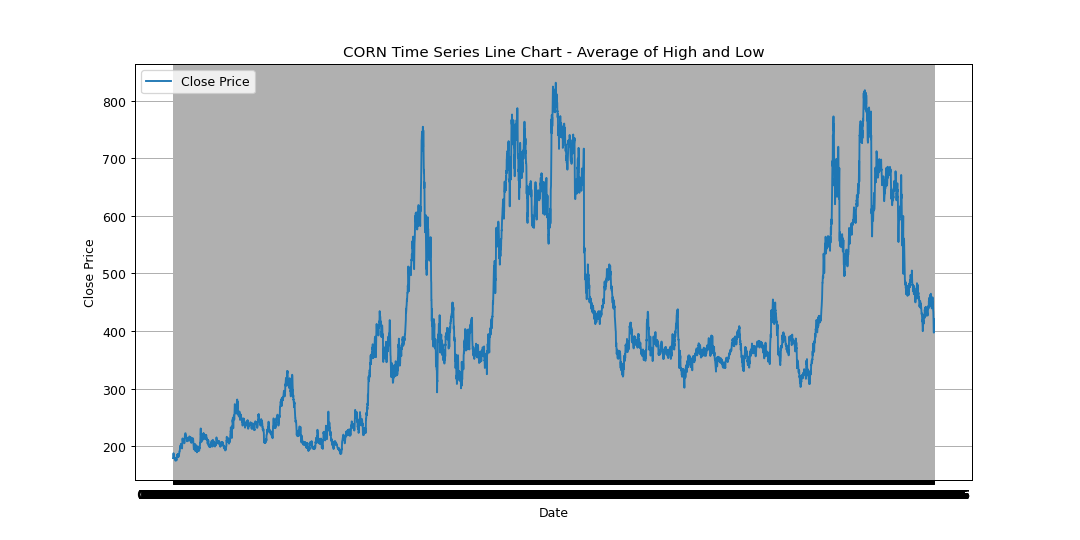

datacorn entries:
              Open    High     Low  Corn_Close  Adj Close  Volume
Date                                                             
17-07-2000  182.25  182.25  178.25      179.25     179.25   19385
18-07-2000  179.00  183.25  179.00      180.75     180.75   25205
19-07-2000  180.00  182.75  178.75      182.00     182.00   17126
20-07-2000  181.50  187.00  181.00      186.00     186.00   18742
21-07-2000  185.50  188.00  185.00      187.75     187.75   16814
...            ...     ...     ...         ...        ...     ...
25-06-2024  433.50  434.50  423.50      425.50     425.50  172164
26-06-2024  425.00  430.00  418.75      420.00     420.00  161453
27-06-2024  420.00  421.25  413.50      413.75     413.75  142693
28-06-2024  414.00  419.00  390.50      397.25     397.25   15899
01-07-2024  421.75  422.75  419.50      421.00     421.00    5472

[5992 rows x 6 columns]
recentcornprice entries:
              Open    High     Low  Corn_Close  Adj Close  Volume
Date    

In [3]:

# Backward fill any remaining missing values
datacorn.fillna(method='bfill', inplace=True)


# Plotting the time series line chart
fig, ax = plt.subplots(figsize=(12, 6))
line, = ax.plot(datacorn.index, datacorn['Close'], label='Close Price')

# Customize the plot
ax.set_title('CORN Time Series Line Chart - Average of High and Low')
ax.set_xlabel('Date')
ax.set_ylabel('Close Price')
ax.legend()
ax.grid(True)

# Set x-axis date format to display day, month, and year
ax.xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%d-%m-%Y'))

# Add crosshair with mplcursors
cursor = mplcursors.cursor(line, hover=True)

# Function to handle cursor movement
def on_move(event):
    x_position = event.xdata
    if x_position is not None:
        date = pd.to_datetime(x_position).strftime("%d-%m-%Y")
        month_year = pd.to_datetime(x_position).strftime("%B %Y")  # Display month and year

        # Find the closest date in the data
        nearest_date = datacorn.index.min(key=lambda d: abs(pd.to_datetime(d) - x_position))

        # Get the average price at the closest date
        close_price = datacorn.loc[nearest_date, 'Close']

        print(f"Cursor X-Axis Position: {date}, Month and Year: {month_year}, Close Price: {close_price}")

# Connect the on_move function to cursor movement
fig.canvas.mpl_connect('motion_notify_event', on_move)

datacorn.rename(columns={'Close': 'Corn_Close'}, inplace=True)

#Save this data frame as a copy so i can use it later to train it with the most recent available data because when i create the target_price column it will remove the latest 30 entries.
recentcornprice = datacorn.copy()

# Show the plot
plt.show()

# Display the modified DataFrame head
print('datacorn entries:')
print(datacorn)
print('recentcornprice entries:')
print(recentcornprice)


## Lets add a column that contains the price of corn exactly one month in the future of each specific row and drop unrequired columns:

In [4]:

# Shift the 'price' column by one to get the next month's price
datacorn['Target_price'] = datacorn['Corn_Close'].shift(-30)

# Drop the last row (NaN for next month's price)
datacorn = datacorn.dropna()

# Assuming 'Open', 'High', 'Adj Close' are the columns you want to delete
columns_to_delete = ['Open', 'High', 'Low', 'Adj Close']



# Drop the unrequired columns from datacorn
datacorn = datacorn.drop(columns=columns_to_delete)

# Display the updated datacorn dataframe
print("Updated datacorn DataFrame:")
print(datacorn)

Updated datacorn DataFrame:
            Corn_Close  Volume  Target_price
Date                                        
17-07-2000      179.25   19385        179.50
18-07-2000      180.75   25205        184.25
19-07-2000      182.00   17126        181.50
20-07-2000      186.00   18742        182.00
21-07-2000      187.75   16814        183.25
...                ...     ...           ...
10-05-2024      455.75     316        425.50
13-05-2024      458.50     317        420.00
14-05-2024      453.75  246243        413.75
15-05-2024      462.50  222335        397.25
16-05-2024      457.00  200532        421.00

[5962 rows x 3 columns]


## Brent Oil Data:

In [5]:
# Brent Oil Data
symbol = 'BZ=F'

# Fetch historical data using yfinance
databrent = yf.download(symbol, period='max')


# Set the date format explicitly to 'day month year'

databrent.index = databrent.index.strftime('%d-%m-%Y')

databrent.rename(columns={'Close': 'Close_Brent'}, inplace=True)

# Plotting the time series line chart using the 'Close_Brent' column
fig, ax = plt.subplots(figsize=(12, 6))
line, = ax.plot(databrent.index, databrent['Close_Brent'], label='Close Price')

# Customize the plot
ax.set_title('BRENT Time Series Line Chart - Close Price')
ax.set_xlabel('Date')
ax.set_ylabel('Close Price')
ax.legend()
ax.grid(True)

# Set x-axis date format to display day, month, and year
ax.xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%d-%m-%Y'))

# Add crosshair with mplcursors
cursor = mplcursors.cursor(line, hover=True)

# Function to handle cursor movement
def on_move(event):
    x_position = event.xdata
    if x_position is not None:
        date = pd.to_datetime(x_position).strftime("%d-%m-%Y")
        month_year = pd.to_datetime(x_position).strftime("%B %Y")  # Display month and year
        
        # Find the closest date in the data
        nearest_date = databrent.index.min(key=lambda d: abs(d - x_position))
        
        # Get the close price at the closest date
        close_price = databrent.loc[nearest_date, 'Close_Brent']
        
        print(f"Cursor X-Axis Position: {date}, Month and Year: {month_year}, Close Price: {close_price:.2f}")

# Connect the on_move function to cursor movement
fig.canvas.mpl_connect('motion_notify_event', on_move)

# Show the plot
plt.show()

print(databrent)



[*********************100%%**********************]  1 of 1 completed


<IPython.core.display.Javascript object>

                 Open       High        Low  Close_Brent  Adj Close  Volume
Date                                                                       
30-07-2007  75.849998  76.529999  75.440002    75.739998  75.739998    2575
31-07-2007  75.699997  77.169998  75.669998    77.050003  77.050003    3513
01-08-2007  77.000000  77.059998  74.860001    75.349998  75.349998    3930
02-08-2007  75.220001  76.209999  74.269997    75.760002  75.760002    6180
03-08-2007  75.389999  76.000000  74.529999    74.750000  74.750000    4387
...               ...        ...        ...          ...        ...     ...
25-06-2024  86.150002  86.320000  84.760002    85.010002  85.010002   26591
26-06-2024  84.889999  85.820000  84.480003    85.250000  85.250000   18107
27-06-2024  85.250000  86.510002  84.889999    86.389999  86.389999   11216
28-06-2024  86.540001  87.230003  86.290001    86.410004  86.410004   38920
01-07-2024  84.900002  86.879997  84.879997    86.599998  86.599998   38920

[4201 rows 

## West Texas Crude Data

In [6]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import mplcursors

# West Texas Crude Data
symbol = 'CL=F'

# Fetch historical data using yfinance
dataWTC = yf.download(symbol, period='max')

# Convert the index to datetime format
dataWTC.index = pd.to_datetime(dataWTC.index, format='%d-%m-%Y')

dataWTC.rename(columns={'Close': 'Close_WTC'}, inplace=True)

# Plotting the time series line chart using the 'Close' column
fig, ax = plt.subplots(figsize=(12, 6))
line, = ax.plot(dataWTC.index, dataWTC['Close_WTC'], label='Close Price')

# Customize the plot
ax.set_title('WTC Time Series Line Chart - Close Price')
ax.set_xlabel('Date')
ax.set_ylabel('Close Price')
ax.legend()
ax.grid(True)

# Display the DataFrame with 'Date' as the index in the 'day month year' format
dataWTC.index = dataWTC.index.strftime('%d-%m-%Y')

# Add crosshair with mplcursors
cursor = mplcursors.cursor(line, hover=True)

# Function to handle cursor movement
def on_move(event):
    x_position = event.xdata
    if x_position is not None:
        date = pd.to_datetime(x_position).strftime("%d-%m-%Y")
        month_year = pd.to_datetime(x_position).strftime("%B %Y")  # Display month and year
        
        # Find the closest date in the data
        nearest_date = dataWTC.index.min(key=lambda d: abs(d - x_position))
        
        # Get the close price at the closest date
        close_price = dataWTC.loc[nearest_date, 'Close_WTC']
        
        print(f"Cursor X-Axis Position: {date}, Month and Year: {month_year}, Close Price: {close_price:.2f}")

# Connect the on_move function to cursor movement
fig.canvas.mpl_connect('motion_notify_event', on_move)

# Show the plot
plt.show()

[*********************100%%**********************]  1 of 1 completed


<IPython.core.display.Javascript object>

## US rainfall Data - Iowa being central corn growing region

Ideal Monthly Rainfall for growing Corn in Iowa US (Approximate):

* January: 25.4 mm
* February: 25.4 mm
* March: 50.8 mm
* April: 76.2 mm
* May: 101.6 mm
* June: 101.6 mm
* July: 101.6 mm
* August: 76.2 mm
* September: 76.2 mm
* October: 50.8 mm
* November: 38.1 mm
* December: 38.1 mm


Ideal Monthly Snowfall for growing Corn in Iowa US (Approximate):

* January: 203.2 mm
* February: 177.8 mm
* March: 101.6 mm
* April: 25.4 mm
* May: 0.0 mm
* June: 0.0 mm
* July: 0.0 mm
* August: 0.0 mm
* September: 0.0 mm
* October: 12.7 mm
* November: 76.2 mm
* December: 152.4 mm

In [7]:
# Replace the path with the correct path to your Excel filefd
xlsx_path = r"C:\Users\tsche\OneDrive\Desktop\My Life Control Centre\IT Projects\Machine Learning Projects\Corn Price Prediction model\Weather Data for Major growing regions\US\nwscoop (1).xlsx"

#source: https://mesonet.agron.iastate.edu/request/coop/fe.phtml
# Read the Excel file into a DataFrame
dfIowaRainAndSnowDepth = pd.read_excel(xlsx_path)

# Specify the column indices to drop
columns_to_drop = ['station', 'station_name', 'doy']

# Drop the specified columns
dfIowaRainAndSnowDepth.drop(columns=columns_to_drop, inplace=True)

# Convert 'day' column to datetime format and set it as the index
dfIowaRainAndSnowDepth.index = pd.to_datetime(dfIowaRainAndSnowDepth['day'], errors='coerce')

# Set the index name to None to avoid displaying it in the output
dfIowaRainAndSnowDepth.index.name = None

# Extract 'Month' and 'Year' from the datetime index
dfIowaRainAndSnowDepth['Month'] = dfIowaRainAndSnowDepth.index.month
dfIowaRainAndSnowDepth['Year'] = dfIowaRainAndSnowDepth.index.year

# Set the index as the new 'day' formatted as 'day month year'
dfIowaRainAndSnowDepth.index = dfIowaRainAndSnowDepth.index.strftime('%d %B %Y')

# Drop the redundant 'day' column
dfIowaRainAndSnowDepth.drop(columns=['day'], inplace=True)

# Display the DataFrame with 'day' as the index in the 'day month year' format, and new 'Month' and 'Year' columns
print("DataFrame with 'day' as the index in the 'day month year' format:")
print(dfIowaRainAndSnowDepth)


DataFrame with 'day' as the index in the 'day month year' format:
                 precipmm  Month  Year
01 January 2000       0.0      1  2000
02 January 2000       0.0      1  2000
03 January 2000       0.5      1  2000
04 January 2000       0.3      1  2000
05 January 2000       0.0      1  2000
...                   ...    ...   ...
19 January 2024       4.3      1  2024
20 January 2024       0.0      1  2024
21 January 2024       0.0      1  2024
22 January 2024       0.0      1  2024
23 January 2024       0.0      1  2024

[8789 rows x 3 columns]


In [8]:
# Define ideal monthly amounts of rain and snow
ideal_rainfall = {
    1: 25.4, 2: 25.4, 3: 50.8, 4: 76.2, 5: 101.6, 6: 101.6,
    7: 101.6, 8: 76.2, 9: 76.2, 10: 50.8, 11: 38.1, 12: 38.1
}

ideal_snowfall = {
    1: 203.2, 2: 177.8, 3: 101.6, 4: 25.4, 5: 0.0, 6: 0.0,
    7: 0.0, 8: 0.0, 9: 0.0, 10: 12.7, 11: 76.2, 12: 152.4
}

# Step 1: Deviation from Ideal Rainfall
dfIowaRainAndSnowDepth['rainfall_deviation'] = dfIowaRainAndSnowDepth['precipmm'] - dfIowaRainAndSnowDepth['Month'].map(ideal_rainfall)

# Step 2: Cumulative Rainfall
dfIowaRainAndSnowDepth['cumulative_rainfall'] = dfIowaRainAndSnowDepth.groupby(['Year', 'Month'])['precipmm'].cumsum()

# Step 3: Rainfall Anomalies
# Assuming you have a threshold for anomalies, for example, 50 units of rainfall.
anomaly_threshold_rain = 50
dfIowaRainAndSnowDepth['rainfall_anomaly'] = (dfIowaRainAndSnowDepth['precipmm'] > anomaly_threshold_rain).astype(int)

# Step 4: Combine into a Categorical Metric
# Define categories based on cumulative rainfall and rainfall anomalies
conditions_rain = [
    (dfIowaRainAndSnowDepth['cumulative_rainfall'] < 100) & (dfIowaRainAndSnowDepth['rainfall_anomaly'] == 0),
    (dfIowaRainAndSnowDepth['cumulative_rainfall'] >= 100) & (dfIowaRainAndSnowDepth['cumulative_rainfall'] < 200) & (dfIowaRainAndSnowDepth['rainfall_anomaly'] == 0),
    (dfIowaRainAndSnowDepth['cumulative_rainfall'] >= 200) | (dfIowaRainAndSnowDepth['rainfall_anomaly'] == 1)
]
categories_rain = ['Low Cumulative, No Anomaly', 'Moderate Cumulative, No Anomaly', 'High Cumulative or Anomaly']

dfIowaRainAndSnowDepth['rainfall_category'] = pd.cut(dfIowaRainAndSnowDepth['cumulative_rainfall'], bins=[-float('inf'), 100, 200, float('inf')],
                                 labels=categories_rain)

# Display the resulting DataFrame
print(dfIowaRainAndSnowDepth[['Year', 'Month', 'precipmm',  'rainfall_deviation', 'cumulative_rainfall',
          'rainfall_anomaly', 'rainfall_category']])


                 Year  Month  precipmm  rainfall_deviation  \
01 January 2000  2000      1       0.0               -25.4   
02 January 2000  2000      1       0.0               -25.4   
03 January 2000  2000      1       0.5               -24.9   
04 January 2000  2000      1       0.3               -25.1   
05 January 2000  2000      1       0.0               -25.4   
...               ...    ...       ...                 ...   
19 January 2024  2024      1       4.3               -21.1   
20 January 2024  2024      1       0.0               -25.4   
21 January 2024  2024      1       0.0               -25.4   
22 January 2024  2024      1       0.0               -25.4   
23 January 2024  2024      1       0.0               -25.4   

                 cumulative_rainfall  rainfall_anomaly  \
01 January 2000                  0.0                 0   
02 January 2000                  0.0                 0   
03 January 2000                  0.5                 0   
04 January 2000        

## Lets combine all variables in the the Corn Dataframe:

In [9]:
# Convert indices to datetime format
datacorn.index = pd.to_datetime(datacorn.index, format='%d-%m-%Y')
dataWTC.index = pd.to_datetime(dataWTC.index, format='%d-%m-%Y')
databrent.index = pd.to_datetime(databrent.index, format='%d-%m-%Y')

# Update the format for dfIowaRainAndSnowDepth
dfIowaRainAndSnowDepth.index = pd.to_datetime(dfIowaRainAndSnowDepth.index, format='%d %B %Y')

# Merge datacorn and dataWTC
merged_df1 = pd.merge(datacorn, dataWTC, left_index=True, right_index=True)

# Merge merged_df1 and databrent
merged_df2 = pd.merge(merged_df1, databrent, left_index=True, right_index=True)

# Merge merged_df2 and dfIowaRainAndSnowDepth
final_merged_df = pd.merge(merged_df2, dfIowaRainAndSnowDepth, left_index=True, right_index=True)

# Display the final result
print(final_merged_df)



            Corn_Close  Volume_x  Target_price     Open_x     High_x  \
2007-07-30      323.50     25315        324.50  76.949997  77.330002   
2007-07-31      325.75     30891        339.75  76.699997  78.279999   
2007-08-01      319.00     25569        330.75  77.940002  78.769997   
2007-08-02      324.00     20120        336.50  76.739998  77.440002   
2007-08-03      326.50     24814        352.25  76.889999  77.360001   
...                ...       ...           ...        ...        ...   
2024-01-17      442.25    205711        415.75  72.000000  72.949997   
2024-01-18      444.00    180948        412.25  72.779999  74.379997   
2024-01-19      445.50    148101        417.50  74.080002  74.910004   
2024-01-22      445.75    112771        413.50  73.410004  75.750000   
2024-01-23      446.50    152301        418.00  74.680000  75.250000   

                Low_x  Close_WTC  Adj Close_x  Volume_y     Open_y  ...  \
2007-07-30  76.050003  76.830002    76.830002    189456  75.

In [10]:
columns_to_drop = ['rainfall_category', 'Open_x', 'High_x', 'Low_x', 'Adj Close_x', 'Volume_y', 'High_y','Low_y','Open_y', 'Adj Close_y', 'Volume']

# Drop specified columns
final_merged_df = final_merged_df.drop(columns=columns_to_drop)

# Display the modified DataFrame
print(final_merged_df)


            Corn_Close  Volume_x  Target_price  Close_WTC  Close_Brent  \
2007-07-30      323.50     25315        324.50  76.830002    75.739998   
2007-07-31      325.75     30891        339.75  78.209999    77.050003   
2007-08-01      319.00     25569        330.75  76.529999    75.349998   
2007-08-02      324.00     20120        336.50  76.860001    75.760002   
2007-08-03      326.50     24814        352.25  75.480003    74.750000   
...                ...       ...           ...        ...          ...   
2024-01-17      442.25    205711        415.75  72.559998    77.879997   
2024-01-18      444.00    180948        412.25  74.080002    79.099998   
2024-01-19      445.50    148101        417.50  73.410004    78.559998   
2024-01-22      445.75    112771        413.50  75.190002    80.059998   
2024-01-23      446.50    152301        418.00  74.370003    79.550003   

            precipmm  Month  Year  rainfall_deviation  cumulative_rainfall  \
2007-07-30       0.0      7  2007

## Machine learning prediction:

In [11]:
from sklearn.model_selection import TimeSeriesSplit
# Additional features to include
additional_features = ['Close_WTC', 'Close_Brent', 'rainfall_deviation']

# Assuming 'Target_price' is your target variable
y = final_merged_df['Target_price']

# Identify and include additional features in X
X = final_merged_df[['Corn_Close'] + additional_features]

# Define the TimeSeriesSplit for time series cross-validation
tscv = TimeSeriesSplit(n_splits=5)  # You can adjust the number of splits as needed

# Initialize an empty list to store model performance metrics
mae_list = []

# Initialize an empty list to store predictions for plotting
all_predictions = []

# Perform time series cross-validation
for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Create and train the Random Forest model
    model = RandomForestRegressor(n_estimators=150, random_state=42)
    model.fit(X_train, y_train)

    # Use the trained model to make predictions on the test set
    predictions = model.predict(X_test)

    # Store predictions for plotting
    all_predictions.extend(predictions)

    # Evaluate the model using mean absolute error
    mae = mean_absolute_error(y_test, predictions)
    mae_list.append(mae)

# Display the mean MAE across all folds
print(f'Mean Cross-Validation Mean Absolute Error: {np.mean(mae_list)}')




Mean Cross-Validation Mean Absolute Error: 55.375339207048455


In [12]:
# Merge predictions_df with final_merged_df based on the index
merged_df = pd.merge(final_merged_df, predictions_df, left_index=True, right_index=True, how='left')

# Display the resulting DataFrame
print(merged_df)


NameError: name 'predictions_df' is not defined

In [ ]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(20, 12))
plt.plot(merged_df.index, merged_df['Corn_Close'], label='Actual Corn Close Price', color='blue')
plt.plot(merged_df.index, merged_df['Predicted_Corn_Close'], label='Predicted Corn Close Price', color='yellow', linestyle='--')

# Adding labels and title
plt.title('Actual vs. Predicted Corn Close Price')
plt.xlabel('Date')
plt.ylabel('Corn Close Price')
plt.legend()

# Show the plot
plt.show()


In [ ]:
# Assuming 'recentcornprice', 'dataWTC', 'databrent', 'dfIowaRainAndSnowDepth' are your DataFrames
# Replace 'feature1', 'feature2', 'feature3', ... with actual feature names
corn_features = recentcornprice[['Corn_Close']]
wtc_features = dataWTC[['Close_WTC']]
brent_features = databrent[['Close_Brent']]
rainfall_features = dfIowaRainAndSnowDepth[['rainfall_deviation']]

# Concatenate the features horizontally
new_data_features = pd.concat([corn_features, wtc_features, brent_features, rainfall_features], axis=1)

# Drop rows with missing values
new_data_features_cleaned = new_data_features.dropna()

# Make sure the columns are in the same order as during training
X_new_data = new_data_features_cleaned[['Corn_Close', 'Close_WTC', 'Close_Brent', 'rainfall_deviation']]

# Now, you can use the trained model to make predictions on new data
predictions_on_new_data = model.predict(X_new_data)

# Display the predicted results for the new data
predicted_results = pd.DataFrame({'Predicted_price': predictions_on_new_data})
print(predicted_results)
